In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
os.listdir(".")

['.ipynb_checkpoints', 'sonar .ipynb', 'sonar.csv']

In [3]:
sonar_df = pd.read_csv("sonar.csv",header=None)
sonar_df = sonar_df.sample(frac=1)
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
74,0.0109,0.0093,0.0121,0.0378,0.0679,0.0863,0.1004,0.0664,0.0941,0.1036,...,0.0077,0.0023,0.0117,0.0053,0.0077,0.0076,0.0056,0.0055,0.0039,R
177,0.0201,0.0165,0.0344,0.0330,0.0397,0.0443,0.0684,0.0903,0.1739,0.2571,...,0.0054,0.0057,0.0137,0.0109,0.0035,0.0056,0.0105,0.0082,0.0036,M
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027,R
99,0.0201,0.0423,0.0554,0.0783,0.0620,0.0871,0.1201,0.2707,0.1206,0.0279,...,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096,M
73,0.0139,0.0222,0.0089,0.0108,0.0215,0.0136,0.0659,0.0954,0.0786,0.1015,...,0.0062,0.0072,0.0113,0.0012,0.0022,0.0025,0.0059,0.0039,0.0048,R


In [4]:
#label = sonar_df[sonar_df.columns[len(sonar_df.columns)-1]]
label = sonar_df.iloc[:,-1:]
label

,60
74,R
177,M
79,R
99,M
73,R
...,...
52,R
200,M
19,R
80,R


In [5]:
# converting column to flatten array
label = np.ravel(label)
print(label)

['R' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'R'
 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'M'
 'M' 'M' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M'
 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'R'
 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'M'
 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'M'
 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R'
 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'R'
 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'R'
 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M'
 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'M'
 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'R']


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#le.fit_transform(label,label)
label = le.fit_transform(label)

In [7]:
print(type(label))
print(label)

<class 'numpy.ndarray'>
[1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0
 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1]


In [8]:
label = label.astype('float')
print(label)
print(type(label))

[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.]
<class 'numpy.ndarray'>


In [9]:
variety = sonar_df.iloc[:, :-1]
variety

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
74,0.0109,0.0093,0.0121,0.0378,0.0679,0.0863,0.1004,0.0664,0.0941,0.1036,...,0.0124,0.0077,0.0023,0.0117,0.0053,0.0077,0.0076,0.0056,0.0055,0.0039
177,0.0201,0.0165,0.0344,0.0330,0.0397,0.0443,0.0684,0.0903,0.1739,0.2571,...,0.0125,0.0054,0.0057,0.0137,0.0109,0.0035,0.0056,0.0105,0.0082,0.0036
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0161,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027
99,0.0201,0.0423,0.0554,0.0783,0.0620,0.0871,0.1201,0.2707,0.1206,0.0279,...,0.0081,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096
73,0.0139,0.0222,0.0089,0.0108,0.0215,0.0136,0.0659,0.0954,0.0786,0.1015,...,0.0024,0.0062,0.0072,0.0113,0.0012,0.0022,0.0025,0.0059,0.0039,0.0048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.0087,0.0046,0.0081,0.0230,0.0586,0.0682,0.0993,0.0717,0.0576,0.0818,...,0.0015,0.0052,0.0038,0.0079,0.0114,0.0050,0.0030,0.0064,0.0058,0.0030
200,0.0131,0.0387,0.0329,0.0078,0.0721,0.1341,0.1626,0.1902,0.2610,0.3193,...,0.0137,0.0150,0.0076,0.0032,0.0037,0.0071,0.0040,0.0009,0.0015,0.0085
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0153,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063
80,0.0229,0.0369,0.0040,0.0375,0.0455,0.1452,0.2211,0.1188,0.0750,0.1631,...,0.0115,0.0064,0.0022,0.0122,0.0151,0.0056,0.0026,0.0029,0.0104,0.0163


In [10]:
print(type(variety))
variety = variety.values
print(type(variety))
print(variety)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[0.0109 0.0093 0.0121 ... 0.0056 0.0055 0.0039]
 [0.0201 0.0165 0.0344 ... 0.0105 0.0082 0.0036]
 [0.0108 0.0086 0.0058 ... 0.0023 0.0026 0.0027]
 ...
 [0.0126 0.0149 0.0641 ... 0.0094 0.0116 0.0063]
 [0.0229 0.0369 0.004  ... 0.0029 0.0104 0.0163]
 [0.0239 0.0189 0.0466 ... 0.0026 0.0036 0.0024]]


In [11]:
print(variety.shape)
print(label.shape)

(208, 60)
(208,)


In [12]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)
# 
#x_train, x_val, y_train, y_val = train_test_split(variety, label, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1)

In [13]:
print("train :",x_train.shape)
print("train label :",y_train.shape)
print("test :",x_test.shape)
print("test label:",y_test.shape)
print("validation :",x_val.shape)
print("validation label :",y_val.shape)

train : (145, 60)
train label : (145,)
test : (42, 60)
test label: (42,)
validation : (21, 60)
validation label : (21,)


# training on (training & Validation)

In [14]:
def training_Validation(batch_size,epochs,drop_ratio):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation="relu"),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
    ])
    
    model.compile(optimizer='adam', # adam # RMSprop
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #Plotting the training and validation loss

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
    
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #return model

batch_size : 128 
 epochs : 70 
 drop_ratio : 0.002
Train on 145 samples, validate on 21 samples
Epoch 1/70
145/145 [==============================] - 1s 8ms/sample - loss: 0.6876 - accuracy: 0.5310 - val_loss: 0.6799 - val_accuracy: 0.5238
Epoch 2/70
145/145 [==============================] - 0s 324us/sample - loss: 0.6758 - accuracy: 0.5517 - val_loss: 0.6774 - val_accuracy: 0.5238
Epoch 3/70
145/145 [==============================] - 0s 455us/sample - loss: 0.6695 - accuracy: 0.5517 - val_loss: 0.6744 - val_accuracy: 0.5238
Epoch 4/70
145/145 [==============================] - 0s 358us/sample - loss: 0.6660 - accuracy: 0.5448 - val_loss: 0.6746 - val_accuracy: 0.5238
Epoch 5/70
145/145 [==============================] - 0s 372us/sample - loss: 0.6642 - accuracy: 0.5379 - val_loss: 0.6737 - val_accuracy: 0.5238
Epoch 6/70
145/145 [==============================] - 0s 365us/sample - loss: 0.6616 - accuracy: 0.5379 - val_loss: 0.6720 - val_accuracy: 0.5238
Epoch 7/70
145/145 [=========

145/145 [==============================] - 0s 317us/sample - loss: 0.3358 - accuracy: 0.8828 - val_loss: 0.5061 - val_accuracy: 0.7143
Epoch 57/70
145/145 [==============================] - 0s 310us/sample - loss: 0.3352 - accuracy: 0.8897 - val_loss: 0.5034 - val_accuracy: 0.7143
Epoch 58/70
145/145 [==============================] - 0s 303us/sample - loss: 0.3317 - accuracy: 0.9034 - val_loss: 0.4947 - val_accuracy: 0.6667
Epoch 59/70
145/145 [==============================] - 0s 303us/sample - loss: 0.3250 - accuracy: 0.8828 - val_loss: 0.5078 - val_accuracy: 0.6667
Epoch 60/70
145/145 [==============================] - 0s 296us/sample - loss: 0.3402 - accuracy: 0.8483 - val_loss: 0.4919 - val_accuracy: 0.6667
Epoch 61/70
145/145 [==============================] - 0s 310us/sample - loss: 0.3181 - accuracy: 0.8897 - val_loss: 0.5072 - val_accuracy: 0.7143
Epoch 62/70
145/145 [==============================] - 0s 296us/sample - loss: 0.3320 - accuracy: 0.8759 - val_loss: 0.4919 - val_

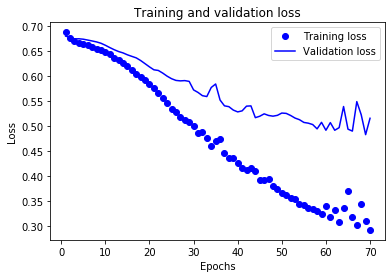

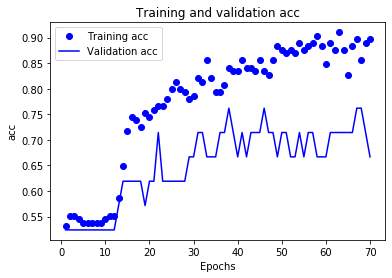

Test loss : 53.90880107879639 %
Test accuracy : 80.95238208770752 %


In [15]:
batch_size = 128 # 512 #256  #128
epochs = 70 # 230
drop_ratio = 0.002 #0.02 #0.03 #0.04 # 0.03  #0.001
training_Validation(batch_size,epochs,drop_ratio)

# training on (k-fold on,training & Validation)

In [16]:
# split in training 80%, test 20% test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)

def kfold_training_Validation(batch_size,epochs,drop_ratio,split):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_shape=(60,)),
        tf.keras.layers.Dropout(drop_ratio),
        tf.keras.layers.Dense(48, activation='relu'),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    from sklearn.model_selection import KFold
    kf = KFold(n_splits=split)
    kf.get_n_splits()
    
    # K-fold not using correctly
    
    for train_index, test_index in kf.split(x_train):
        x_train1, x_test1 = x_train[train_index], x_train[test_index]
        y_train1, y_test1 = y_train[train_index], y_train[test_index] 

    history = model.fit(x_train1, y_train1,batch_size=batch_size,epochs=epochs,verbose=1)
    
    
    evaluation = model.evaluate(x_test1,  y_test1,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #return model

In [17]:
# Training and Validation (K-Fold)
batch_size = 128 #512  #128 # 32 , 128 , 256
epochs = 130
drop_ratio = 0.001 # 0.001    # 0.001, 0.9, 0.75, 0.75, 0.5, 0.5, 0.5
split = 6
kfold_training_Validation(batch_size,epochs,drop_ratio,split)

batch_size : 128 
 epochs : 130 
 drop_ratio : 0.001
Train on 139 samples
Epoch 1/130
139/139 [==============================] - 1s 6ms/sample - loss: 0.6963 - accuracy: 0.5324
Epoch 2/130
139/139 [==============================] - 0s 79us/sample - loss: 0.6801 - accuracy: 0.5540
Epoch 3/130
139/139 [==============================] - 0s 65us/sample - loss: 0.6700 - accuracy: 0.5827
Epoch 4/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6604 - accuracy: 0.5683
Epoch 5/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6573 - accuracy: 0.5755
Epoch 6/130
139/139 [==============================] - 0s 79us/sample - loss: 0.6533 - accuracy: 0.5755
Epoch 7/130
139/139 [==============================] - 0s 79us/sample - loss: 0.6481 - accuracy: 0.6115
Epoch 8/130
139/139 [==============================] - 0s 79us/sample - loss: 0.6394 - accuracy: 0.6331
Epoch 9/130
139/139 [==============================] - 0s 79us/sample - loss: 0.6311 - accuracy

Epoch 78/130
139/139 [==============================] - 0s 72us/sample - loss: 0.3086 - accuracy: 0.8849
Epoch 79/130
139/139 [==============================] - 0s 72us/sample - loss: 0.3082 - accuracy: 0.8633
Epoch 80/130
139/139 [==============================] - 0s 72us/sample - loss: 0.3103 - accuracy: 0.8633
Epoch 81/130
139/139 [==============================] - 0s 79us/sample - loss: 0.3151 - accuracy: 0.8561
Epoch 82/130
139/139 [==============================] - 0s 72us/sample - loss: 0.3017 - accuracy: 0.8777
Epoch 83/130
139/139 [==============================] - 0s 79us/sample - loss: 0.3031 - accuracy: 0.9065
Epoch 84/130
139/139 [==============================] - ETA: 0s - loss: 0.3024 - accuracy: 0.89 - 0s 72us/sample - loss: 0.3252 - accuracy: 0.8777
Epoch 85/130
139/139 [==============================] - 0s 86us/sample - loss: 0.3004 - accuracy: 0.8921
Epoch 86/130
139/139 [==============================] - 0s 72us/sample - loss: 0.3010 - accuracy: 0.8633
Epoch 87/130


# Normalizing Features & One hot encoding on Labels

In [18]:
print(variety)

[[0.0109 0.0093 0.0121 ... 0.0056 0.0055 0.0039]
 [0.0201 0.0165 0.0344 ... 0.0105 0.0082 0.0036]
 [0.0108 0.0086 0.0058 ... 0.0023 0.0026 0.0027]
 ...
 [0.0126 0.0149 0.0641 ... 0.0094 0.0116 0.0063]
 [0.0229 0.0369 0.004  ... 0.0029 0.0104 0.0163]
 [0.0239 0.0189 0.0466 ... 0.0026 0.0036 0.0024]]


In [19]:
# normalizing data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
variety = scale.fit_transform(variety)
print(type(variety))
print(variety.shape)
print()
print(variety)

<class 'numpy.ndarray'>
(208, 60)

[[-0.7963148  -0.88613151 -0.82774733 ... -0.36395109 -0.39590432
  -0.51947507]
 [-0.39519131 -0.66715743 -0.24604298 ...  0.39523629  0.04194496
  -0.5792487 ]
 [-0.80067483 -0.90742066 -0.99208533 ... -0.87524056 -0.86618687
  -0.75856962]
 ...
 [-0.72219415 -0.71581834  0.52869331 ...  0.22480647  0.59331072
  -0.04128596]
 [-0.27311026 -0.04673085 -1.03903905 ... -0.78227884  0.39871104
   1.95116865]
 [-0.22950988 -0.59416606  0.07219886 ... -0.8287597  -0.70402047
  -0.81834326]]


In [20]:
print(label)

[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.]


In [21]:
# one hot encoding
label = tf.keras.utils.to_categorical(label)
print(label)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 

In [22]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)
# 
#x_train, x_val, y_train, y_val = train_test_split(variety, label, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1)

print("train :",x_train.shape)
print("train label :",y_train.shape)
print("test :",x_test.shape)
print("test label:",y_test.shape)
print("validation :",x_val.shape)
print("validation label :",y_val.shape)

train : (145, 60)
train label : (145, 2)
test : (42, 60)
test label: (42, 2)
validation : (21, 60)
validation label : (21, 2)


In [23]:
#  training on (training & Validation)

def training_Validation(batch_size,epochs,drop_ratio):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
    ])
    
    model.compile(optimizer='adam', # adam # RMSprop
              loss='categorical_crossentropy', # sparse_categorical_crossentropy
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #Plotting the training and validation loss

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
    
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #Predictoin
    #prediction = model.predict_classes(x_test)[0]
    #print(prediction)
    #print(y_test[0])
    
    #return model

batch_size : 128 
 epochs : 35 
 drop_ratio : 0.001
Train on 145 samples, validate on 21 samples
Epoch 1/35
145/145 [==============================] - 2s 11ms/sample - loss: 0.7915 - accuracy: 0.5517 - val_loss: 0.6931 - val_accuracy: 0.5714
Epoch 2/35
145/145 [==============================] - 0s 324us/sample - loss: 0.5449 - accuracy: 0.7448 - val_loss: 0.6641 - val_accuracy: 0.5714
Epoch 3/35
145/145 [==============================] - 0s 400us/sample - loss: 0.4382 - accuracy: 0.8000 - val_loss: 0.6334 - val_accuracy: 0.6190
Epoch 4/35
145/145 [==============================] - 0s 407us/sample - loss: 0.3581 - accuracy: 0.8759 - val_loss: 0.6082 - val_accuracy: 0.6190
Epoch 5/35
145/145 [==============================] - 0s 414us/sample - loss: 0.3184 - accuracy: 0.8690 - val_loss: 0.5896 - val_accuracy: 0.6667
Epoch 6/35
145/145 [==============================] - 0s 414us/sample - loss: 0.2862 - accuracy: 0.9034 - val_loss: 0.5774 - val_accuracy: 0.6667
Epoch 7/35
145/145 [========

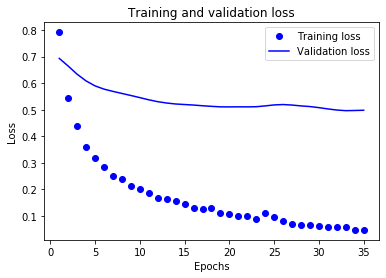

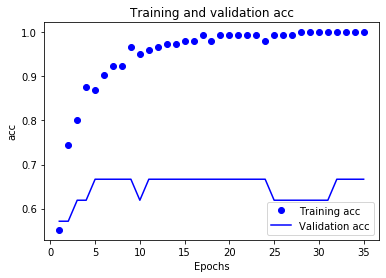

Test loss : 39.76757824420929 %
Test accuracy : 83.33333134651184 %


In [24]:
batch_size =  128   # 512 #256  #128
epochs = 35 # 60 # 230
drop_ratio = 0.001 #0.02 #0.03 #0.04 # 0.03  #0.001
training_Validation(batch_size,epochs,drop_ratio)

# K-Fold

In [25]:
# split in training 80%, test 20% test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)

def kfold_training_Validation(batch_size,epochs,drop_ratio,split):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio)
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
    ])
    
    model.compile(optimizer='adam', # adam # RMSprop
              loss='categorical_crossentropy', # sparse_categorical_crossentropy
              metrics=['accuracy'])
           
    k = split
    num_val_samples = len(x_train) // 4
    num_epochs = 100
    all_scores = []
    all_mae_histories = []

    for i in range(k):
        print('processing fold # ', i)
        # prepare the validation data: data from partition # k
        val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  
        # prepare the training data: data from data - k
        partial_train_data = np.concatenate(                    
        [x_train[:i * num_val_samples],
        x_train[(i + 1 ) * num_val_samples:]],
        axis = 0)
        partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1 ) * num_val_samples:]],
        axis = 0)
        
        history = model.fit(partial_train_data, partial_train_targets,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    evaluation = model.evaluate(val_data,  val_targets,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #return model

    #Predictoin
    a = 41
    prediction = model.predict_classes(x_test)[a]
    print("Predicted value :",prediction)
    #print(y_test[a])
    
    from numpy import argmax
    print("actual value :",argmax(tf.keras.utils.to_categorical(prediction, a)))

In [26]:
# Training and Validation (K-Fold)
batch_size = 128 
epochs = 40
drop_ratio = 0.001 
split = 4
kfold_training_Validation(batch_size,epochs,drop_ratio,split)

batch_size : 128 
 epochs : 40 
 drop_ratio : 0.001
processing fold #  0
Train on 125 samples, validate on 21 samples
Epoch 1/40
125/125 [==============================] - 1s 11ms/sample - loss: 1.3284 - accuracy: 0.4640 - val_loss: 0.6921 - val_accuracy: 0.5238
Epoch 2/40
125/125 [==============================] - 0s 304us/sample - loss: 0.9287 - accuracy: 0.5760 - val_loss: 0.6165 - val_accuracy: 0.6190
Epoch 3/40
125/125 [==============================] - 0s 464us/sample - loss: 0.6719 - accuracy: 0.6640 - val_loss: 0.5539 - val_accuracy: 0.7619
Epoch 4/40
125/125 [==============================] - 0s 448us/sample - loss: 0.5024 - accuracy: 0.7520 - val_loss: 0.5075 - val_accuracy: 0.8095
Epoch 5/40
125/125 [==============================] - 0s 408us/sample - loss: 0.4021 - accuracy: 0.7760 - val_loss: 0.4696 - val_accuracy: 0.8571
Epoch 6/40
125/125 [==============================] - 0s 440us/sample - loss: 0.3355 - accuracy: 0.8640 - val_loss: 0.4388 - val_accuracy: 0.8571
Epoch 7

Epoch 16/40
125/125 [==============================] - 0s 376us/sample - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 1.0000
Epoch 17/40
125/125 [==============================] - 0s 368us/sample - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 18/40
125/125 [==============================] - 0s 344us/sample - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 19/40
125/125 [==============================] - 0s 424us/sample - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 1.0000
Epoch 20/40
125/125 [==============================] - 0s 376us/sample - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 1.0000
Epoch 21/40
125/125 [==============================] - 0s 424us/sample - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 22/40
125/125 [==============================] - 0s 392us/sample - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0

Epoch 32/40
125/125 [==============================] - 0s 464us/sample - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 33/40
125/125 [==============================] - 0s 544us/sample - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 34/40
125/125 [==============================] - 0s 384us/sample - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 35/40
125/125 [==============================] - 0s 424us/sample - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 36/40
125/125 [==============================] - 0s 488us/sample - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 37/40
125/125 [==============================] - 0s 320us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 38/40
125/125 [==============================] - 0s 496us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0